<a href="https://colab.research.google.com/github/Akif-Mufti/Deep-learning-2.0/blob/master/Digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import dependencies

import cv2
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Import MNIST data
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets("./data", one_hot=True)

num_training = mnist_data.train.num_examples
num_testing = mnist_data.test.num_examples
num_validation = mnist_data.validation.num_examples

print("MNIST Datasize : Training Samples {0}, Testing Samples {1}, Validation Samples".format(num_training,num_testing,num_validation))

#defining the neural network 

n_input = 784 #image of size 28 X28
n_hidden_1 = 512 #first hidden layer
n_hidden_2 = 256 #second hidden layer
n_hidden_3 = 128 #third hidden layer
n_output = 10  #output layer, as we need to classify the digits from (0 to 9)

#hyper parameters (remain constant throughout the process

learning_rate = 1e-4 #how the parameters will be adjusted at each step of the learning process
epochs = 3000 #how many times we go through the training process
batch_size = 128 #how many training examples we are using at each step 
keep_prop = tf.placeholder(tf.float32)

#building tensorflow graph

X = tf.placeholder(tf.float32, [None, n_input]) #[none, 784] [any number of training sets ]
Y = tf.placeholder(tf.float32, [None, n_output]) #[none, 10 ]

#defining the weights and biases

nn_weight = {"W1": tf.Variable(tf.truncated_normal([n_input,n_hidden_1],stddev=0.1)),
             "W2": tf.Variable(tf.truncated_normal([n_hidden_1,n_hidden_2],stddev=0.1)),
             "W3": tf.Variable(tf.truncated_normal([n_hidden_2,n_hidden_3],stddev=0.1)),
             "Wout": tf.Variable(tf.truncated_normal([n_hidden_3,n_output],stddev=0.1))
            }
nn_bias = {
           "B1": tf.Variable(tf.truncated_normal([n_hidden_1])),
           "B2": tf.Variable(tf.truncated_normal([n_hidden_2])),
           "B3": tf.Variable(tf.truncated_normal([n_hidden_3])),
           "B4": tf.Variable(tf.truncated_normal([n_output]))
            }
                       
#creating a neural network model
nn_layer1 = tf.add(tf.matmul(X, nn_weight["W1"]),nn_bias["B1"])
nn_layer2 = tf.add(tf.matmul(nn_layer1, nn_weight["W2"]),nn_bias["B2"])
nn_layer3 = tf.add(tf.matmul(nn_layer2, nn_weight["W3"]),nn_bias["B3"])
layer_drop = tf.nn.dropout(nn_layer3, keep_prop)
output_layer = tf.add(tf.matmul(layer_drop, nn_weight["Wout"]),nn_bias["B4"])

#define the loss
computed_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = output_layer, labels= Y))

#defining the optimizer 

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(computed_loss)

#defining the prediction
prediction_out = tf.equal(tf.arg_max(output_layer,1),tf.argmax(Y,1))

#define accuracy of the model
nn_accuracy = tf.reduce_mean(tf.cast(prediction_out,tf.float32))

#initialize all the variables
init = tf.global_variables_initializer()

saver = tf.train.Saver()

#executing the computational graph

with tf.Session() as sess:
  sess.run(init)
  for i in range(epochs):
    mini_batch_x, mini_batch_y = mnist_data.train.next_batch(batch_size)
    #print(mini_batch_x[0:1,:].shape)
    mini_batch_val_x, mini_batch_val_y = mnist_data.validation.next_batch(batch_size)
    sess.run(optimizer, feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prop:0.6})

    if i%100 == 0:
      mini_batch_loss, mini_batch_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X : mini_batch_x, Y : mini_batch_y, keep_prop:1})
      mini_batch_val_loss, mini_batch_val_accuracy = sess.run([computed_loss, nn_accuracy], feed_dict = {X : mini_batch_val_x, Y : mini_batch_val_y, keep_prop:0.6})

      print("Iteration : {0}, Train_loss = {1}, Train_accuracy = {2}, val_loss = {3}, val_accuracy = {4}".format(i,mini_batch_loss,mini_batch_accuracy,mini_batch_val_loss, mini_batch_val_accuracy))
  print("optimization finished")  
  test_accuracy = sess.run(nn_accuracy, feed_dict = {X:mnist_data.test.images, Y:mnist_data.test.labels, keep_prop :1.0}) 
  print("Testing accuracy is {0}".format(test_accuracy)) 
  saver_path = saver.save(sess,"./model/my_model.ckpt")








Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/mo

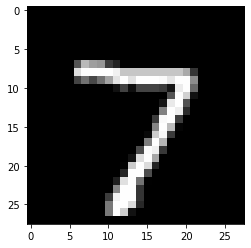

(1, 784)

In [7]:

#upload the test image
img = cv2.imread("7.jpg")
gray_image =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

rescaled_image = cv2.resize(gray_image, (28,28))
plt.imshow(rescaled_image, cmap = 'gray')
plt.show()
rescaled_image.shape
#test_image = rescaled_image.flatten()

dum = rescaled_image.reshape(1,-1)/255
dum.shape



             

In [8]:
with tf.Session() as sess:
  saver.restore(sess, "./model/my_model.ckpt")
  Z = output_layer.eval(feed_dict = {X :dum, keep_prop: 1.0})
  y_pred = np.argmax(Z , axis =1)
  print("prediction for test image is {0}".format(y_pred))

INFO:tensorflow:Restoring parameters from ./model/my_model.ckpt
prediction for test image is [7]
